## Abstract

Airbnb has a growing share of the accomodation industry all over the globe. Airbnb offers different types of accomodation ranging from shared room till villas. In many cities the short-term rental of flats is a rental price rising force and it reduces the number of available flats for inhabitants on the city. 
With data from the Italian webpage insiteaibnb (http://insideairbnb.com/), I analysed the AirBnb market in Rome, Italy. 

## Import and installing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
pip install missingno


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Defining color schema

In [3]:
c = ['#8e9aaf', '#cbc0d3', '#efd3d7', '#feeafa', '#dee2ff']

## Load dataset

In [4]:
df = pd.read_csv('data/listings_Rome.csv')

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,256695,https://www.airbnb.com/rooms/256695,20230315024350,2023-03-15,city scrape,Trastevere color-suite,<b>The space</b><br />Apartment totally new in...,NaN,https://a0.muscache.com/pictures/4543522/a51fe...,1350540,...,4.99,4.95,4.91,NaN,t,1,1,0,0,1.54
1,258330,https://www.airbnb.com/rooms/258330,20230315024350,2023-03-15,city scrape,"Sunny with view, WiFi, A/C. Metro, Airport train.","Naturally lit apartment with Wi-Fi, flat-scree...",The apartment is located in the Tuscolano-San ...,https://a0.muscache.com/pictures/b6804ab8-3bc6...,1358462,...,4.99,4.60,4.75,NaN,t,1,1,0,0,0.55
2,137044,https://www.airbnb.com/rooms/137044,20230315024350,2023-03-15,city scrape,In Campo de 'Fiori! For families and friends i...,Your home in Rome! Located in the center of Ro...,This area is a key component of the historic ...,https://a0.muscache.com/pictures/prohost-api/H...,670337,...,4.74,4.90,4.35,NaN,t,1,1,0,0,1.02
3,137157,https://www.airbnb.com/rooms/137157,20230315024350,2023-03-15,city scrape,Super balcony in center on Romans roofs,<b>The space</b><br />Fantastic apartment with...,NaN,https://a0.muscache.com/pictures/867987/95ef7c...,486866,...,4.75,4.75,4.50,NaN,f,5,5,0,0,0.04
4,259075,https://www.airbnb.com/rooms/259075,20230315024350,2023-03-15,city scrape,"City Center: Large, Chic, Modern apartment","Renovated in January 2020, new, wide, ideal f...",City Center-Walking distance from the major po...,https://a0.muscache.com/pictures/810f6a92-b702...,1311777,...,4.89,4.71,4.68,ATR 003602\nCodice identificativo id869,t,2,2,0,0,1.29


In [6]:
# check the variables in the dataset

df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
# check the regions/neughbourhoods of Rome
df['neighbourhood_cleansed'].unique()

array(['I Centro Storico', 'VII San Giovanni/Cinecittà', 'XIII Aurelia',
       'VIII Appia Antica', 'V Prenestino/Centocelle',
       'II Parioli/Nomentano', 'XII Monte Verde', 'XIV Monte Mario',
       'XV Cassia/Flaminia', 'IX Eur', 'IV Tiburtina',
       'VI Roma delle Torri', 'X Ostia/Acilia', 'III Monte Sacro',
       'XI Arvalia/Portuense'], dtype=object)

### Cleaning Data

<Axes: >

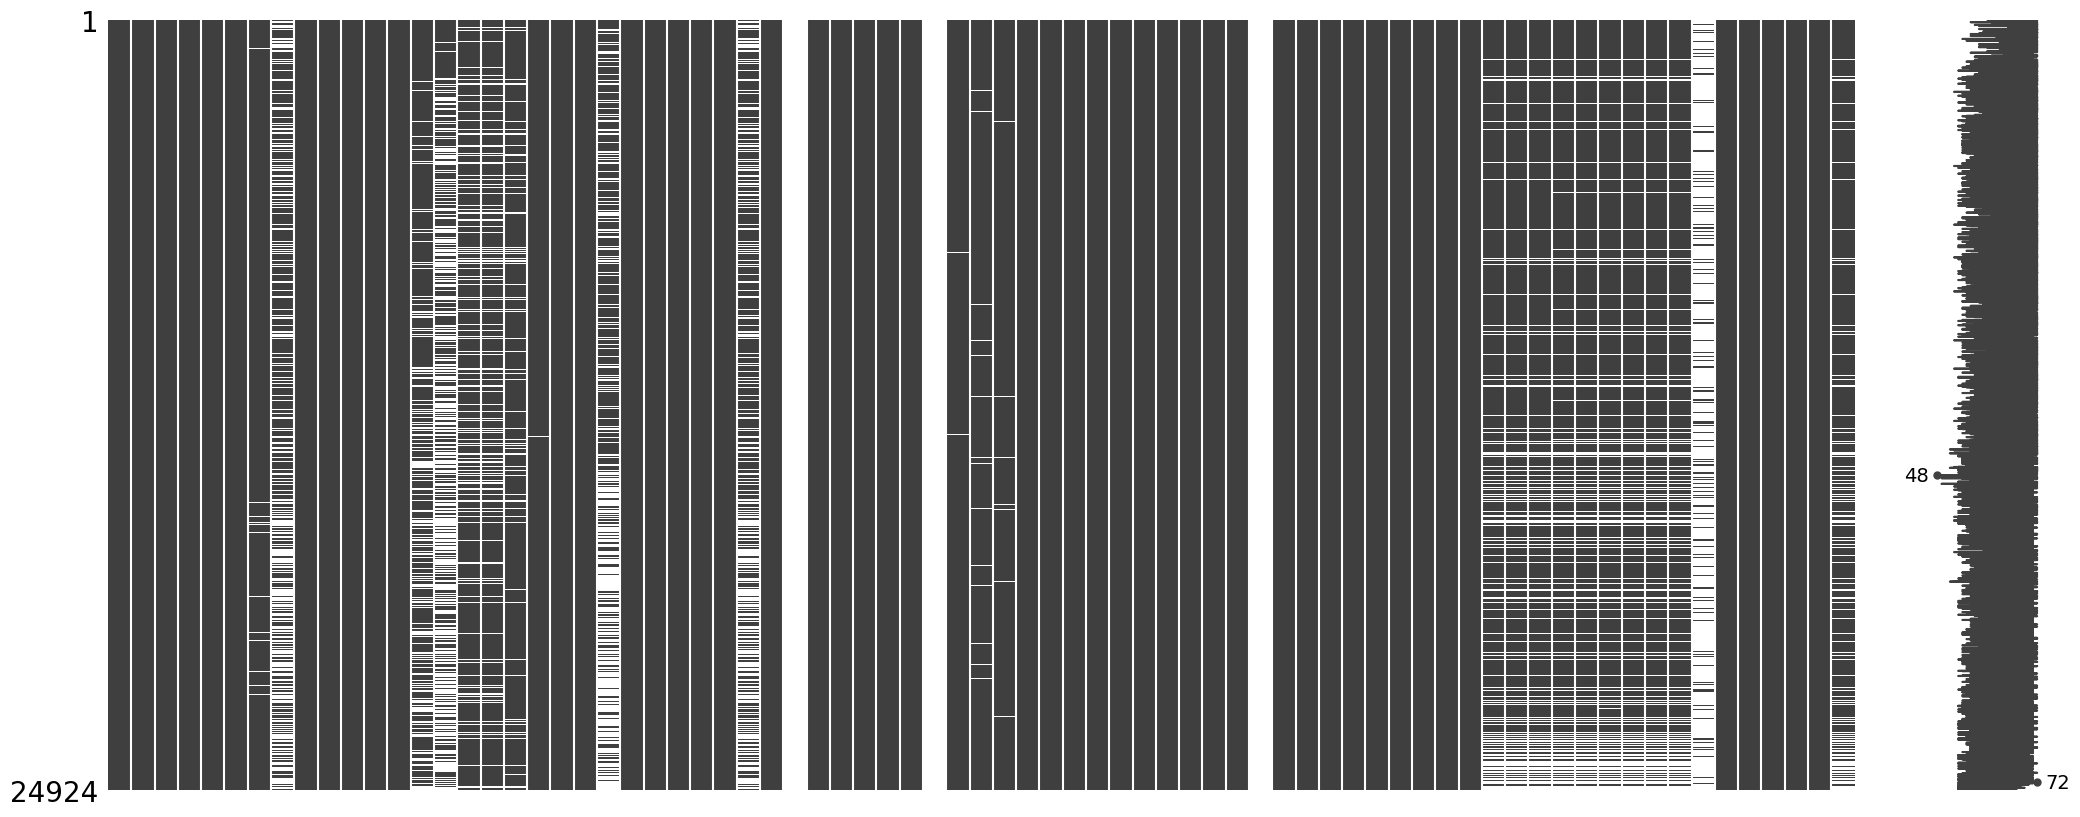

In [8]:
# search for patterns in the missing data

import missingno as msno
msno.matrix(df)

Some variables are mainly empty, it worths to take a closer look, which ones.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24924 entries, 0 to 24923
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24924 non-null  int64  
 1   listing_url                                   24924 non-null  object 
 2   scrape_id                                     24924 non-null  int64  
 3   last_scraped                                  24924 non-null  object 
 4   source                                        24924 non-null  object 
 5   name                                          24920 non-null  object 
 6   description                                   24465 non-null  object 
 7   neighborhood_overview                         15266 non-null  object 
 8   picture_url                                   24924 non-null  object 
 9   host_id                                       24924 non-null 

In [10]:
# Number of listings in Rome, separate offers

len(df.index)

24924

In [11]:
# Number of hosts

df['host_id'].nunique()

12935

From the discrepancy between the number of accomodation offered and the number of hosts, it is visiable that some hosts are offereing more than one accomodation.

In [12]:
df_host = df.groupby('host_id').id.count().sort_values(ascending = False)

In [13]:
df_host.head(25)

host_id
23532561     239
96122546     152
201739458     83
63191555      70
8973851       57
2405376       52
51503378      49
1107433       48
316068        47
45788344      47
230950667     45
224869116     43
1369759       43
4453257       42
206380158     39
20428282      39
13766340      36
1764914       34
4417813       33
24459917      33
115777793     31
94907986      29
16611461      28
6519534       28
20607918      27
Name: id, dtype: int64

In [14]:
# The largest host in Rome offers 239 accomodations

df.loc[df['host_id'] == 23532561].id.count()

239

In [15]:
df[['id', 'host_id', 'name', 'host_name']].loc[df['host_id'] == 23532561]

,id,host_id,name,host_name
2244,4539118,23532561,iFlat | Monti secret Garden,IFlat
2429,4870901,23532561,iFlat | Spanish Steps Studio Apartment,IFlat
2816,5657500,23532561,Pantheon Cozy Apartment n. 3,IFlat
2817,5657827,23532561,Pantheon Cozy Apartment n. 2,IFlat
2819,5658485,23532561,Pantheon Cozy Apartment n. 7,IFlat
...,...,...,...,...
24367,824617240772357369,23532561,iFlat | Trastevere Unique Loft,IFlat
24534,831724047233388666,23532561,iFlat | Vatican Elegant Apartment,IFlat
24611,839654436113394668,23532561,iFlat | The Carpet Apartment,IFlat
24612,839689394836536650,23532561,iFlat | The gem of the center,IFlat


In [16]:
df_host2 = df.groupby(['host_id'])['host_id'].count()

In [17]:
df_host2

host_id
1944         7
2353         1
3047         6
3504         5
11756        1
            ..
504566419    1
504725606    1
504749365    1
505156851    1
505209685    1
Name: host_id, Length: 12935, dtype: int64

In [18]:
# 9007 hosts are offering a single accommodation.

df_host2.loc[df_host2== 1].count()

9007

In [19]:
# 3928 hosts are offering more than one accommodation on Airbnb
df_host2.loc[df_host2 > 1].count()

3928

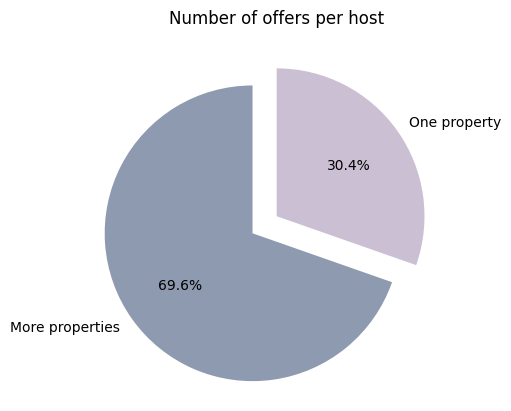

In [20]:
y = np.array([9007, 3928])
mylabels = ["More properties", "One property"]

mycolors =c
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Number of offers per host")
plt.show() 

### Location of the accomodations in Rome

In [21]:
# Name of the regions within Rome

df['neighbourhood_cleansed'].unique()

array(['I Centro Storico', 'VII San Giovanni/Cinecittà', 'XIII Aurelia',
       'VIII Appia Antica', 'V Prenestino/Centocelle',
       'II Parioli/Nomentano', 'XII Monte Verde', 'XIV Monte Mario',
       'XV Cassia/Flaminia', 'IX Eur', 'IV Tiburtina',
       'VI Roma delle Torri', 'X Ostia/Acilia', 'III Monte Sacro',
       'XI Arvalia/Portuense'], dtype=object)

In [22]:
# Number of accommodation per neighbourhood

df.groupby('neighbourhood_cleansed').id.count()

neighbourhood_cleansed
I Centro Storico              13894
II Parioli/Nomentano           1725
III Monte Sacro                 369
IV Tiburtina                    402
IX Eur                          312
V Prenestino/Centocelle         914
VI Roma delle Torri             196
VII San Giovanni/Cinecittà     1740
VIII Appia Antica               679
X Ostia/Acilia                  664
XI Arvalia/Portuense            416
XII Monte Verde                1202
XIII Aurelia                   1485
XIV Monte Mario                 502
XV Cassia/Flaminia              424
Name: id, dtype: int64

### License

According to the actual regulations in Rome (https://airbtics.com/airbnb-regulation-in-rome/) **CIR code** is needed for hosting for a short time.

In [23]:
df[['id', 'host_id', 'license']].head(10)

,id,host_id,license
0,256695,1350540,NaN
1,258330,1358462,NaN
2,137044,670337,NaN
3,137157,486866,NaN
4,259075,1311777,ATR 003602\nCodice identificativo id869
5,137713,246365,NaN
6,137724,246365,NaN
7,138192,674843,NaN
8,2737,3047,NaN
9,262254,1374312,NaN


In [24]:
df['license'].nunique()

3649

In [25]:
# 20469 offers do not indicate a licence number...

df['license'].isnull().sum()

20469

In [26]:
df['license'].unique()

array([nan, 'ATR 003602\nCodice identificativo id869',
       'Aut. Comune di Roma QA 2016/160 del 04/01/2016 CIU. BBN-000320-8 Reg. Lazio ID 603',
       ..., '20128 codice identificativo regionale', '20099',
       'CIR 20155 - QA/2023/10205'], dtype=object)

In [27]:
# Checking for CIR codes in the dataframe

df['license'] = df['license'].fillna('')
df_license = df[df['license'].str.contains('CIR')]


In [28]:
df_license[['id', 'host_id', 'license']]

,id,host_id,license
202,240706,1262633,CIR-2189
216,90666,491169,SCIA Comune di Roma Prot. QA/2015/29912 del 8/...
334,501912,2476686,CIR: 7549 - CIU: ATR-007981-4
517,674274,2476686,CIR: 7549 - CIU: ATR-007981-4
578,774608,2462872,CIR ID 6430 Regione Lazio / CIU ATR-004559-2
...,...,...,...
24011,802719213588782292,495672577,CIR 17675
24105,816383835180972028,496365761,CIR 19402
24527,822433921879834502,500176352,CIR: 19273 / Comunicazione N. QA/2022/38497
24723,837551838485848361,457870141,CIR: 19671


Out of 24924 listings in Rome, 108 has a correctly indicated CIR number.

### The biggest host in Rome (host_id = 23532561)

In [29]:
df_tophost = df.query('host_id == 23532561')

In [30]:
df_tophost.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2244,4539118,https://www.airbnb.com/rooms/4539118,20230315024350,2023-03-15,city scrape,iFlat | Monti secret Garden,4pax charming apartment with a private charact...,You will be in the very heart of Rome - Rione ...,https://a0.muscache.com/pictures/57303770/7cfe...,23532561,...,4.80,4.95,4.50,,t,239,238,1,0,1.30
2429,4870901,https://www.airbnb.com/rooms/4870901,20230315024350,2023-03-15,city scrape,iFlat | Spanish Steps Studio Apartment,Studio apartment very close to Spanish Steps a...,NaN,https://a0.muscache.com/pictures/c32dc77c-823a...,23532561,...,4.77,4.82,4.46,,t,239,238,1,0,1.47
2816,5657500,https://www.airbnb.com/rooms/5657500,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 3,Cozy 4 pax apartment located in Piazza delle C...,NaN,https://a0.muscache.com/pictures/84174087/4750...,23532561,...,4.82,4.95,4.72,,t,239,238,1,0,0.80
2817,5657827,https://www.airbnb.com/rooms/5657827,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 2,Cozy 6 pax apartment located in Piazza delle C...,NaN,https://a0.muscache.com/pictures/84145536/fab1...,23532561,...,4.69,4.88,4.52,,t,239,238,1,0,0.54
2819,5658485,https://www.airbnb.com/rooms/5658485,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 7,Cozy 2+1 pax apartment with a beautiful terrac...,The apartment is located in Piazza delle Coppe...,https://a0.muscache.com/pictures/94395593/aefb...,23532561,...,4.88,4.95,4.60,,t,239,238,1,0,1.39


In [31]:
# The biggest host in Rome (iFlat) has 3 separate licences for 238 accommodations.

df_tophost['license'].nunique()

3

In [32]:
df_tophost['license'].unique()

array(['', '15913', 'QA/2019/59359'], dtype=object)

In [33]:
df_tophost['calculated_host_listings_count_private_rooms'].unique()

array([1])

In [34]:
df_tophost['calculated_host_listings_count_entire_homes'].unique()

array([238])

Out of 239 listings, iFlat offers 238 entire flats and 1 private rooms.

### Information about the hosts

In [35]:
df.groupby(['host_id','host_name','host_since','host_response_time','host_is_superhost','host_listings_count', 'host_total_listings_count']).agg(listings=('id', 'count'))

,,,,,,,listings
host_id,host_name,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,
1944,Antonella,2008-08-13,within an hour,f,8.0,13.0,7
3047,Elif,2008-09-18,within a few hours,f,7.0,7.0,6
3504,Laura,2008-10-08,within a few hours,t,5.0,11.0,5
11756,Gea,2009-03-30,within a few hours,f,1.0,2.0,1
12456,Valeria,2009-04-06,within an hour,t,1.0,3.0,1
...,...,...,...,...,...,...,...
503411200,Francesco,2023-03-01,within a few hours,f,1.0,1.0,1
503414894,Isabella,2023-03-01,within a few hours,f,1.0,1.0,1
503495188,Nicoleta,2023-03-02,within a day,f,1.0,1.0,1


In [36]:
df.groupby(['host_id','host_name','host_since','host_is_superhost','calculated_host_listings_count']).agg(listings=('id', 'count')).sort_values(by = 'listings', ascending = False)

,,,,,listings
host_id,host_name,host_since,host_is_superhost,calculated_host_listings_count,
23532561,IFlat,2014-11-09,f,239,239
96122546,Welcome To Our Holiday Homes,2016-09-21,f,152,152
201739458,Your.Rentals,2018-07-12,f,83,83
63191555,Halldis,2016-03-16,f,70,70
8973851,Stefano,2013-09-21,f,57,57
...,...,...,...,...,...
45031736,Patrizia,2015-09-24,f,1,1
45046157,Stefania,2015-09-25,f,1,1
45050619,Lucia,2015-09-25,f,1,1


#### Replace string values with numeric in host_response_time

In [37]:
df['host_response_time'].nunique()

4

In [38]:
df['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day', nan,
       'a few days or more'], dtype=object)

In [39]:
df.loc[df['host_response_time'] == 'within an hour', 'host_response_time'] = 1


In [40]:
df.loc[df['host_response_time'] == 'within a few hours', 'host_response_time'] = 2

In [41]:
df.loc[df['host_response_time'] == 'within a day', 'host_response_time'] = 3

In [42]:
df.loc[df['host_response_time'] == 'a few days or more', 'host_response_time'] = 4

In [43]:
df['host_response_time'].unique()

array([1, 2, 3, nan, 4], dtype=object)

In [44]:
df.groupby(['host_id','host_name','host_since','host_is_superhost','calculated_host_listings_count', 'host_response_time']).agg(listings=('id', 'count'),response_time=('host_response_time', 'mean')).sort_values(by = 'listings', ascending = False)

,,,,,,listings,response_time
host_id,host_name,host_since,host_is_superhost,calculated_host_listings_count,host_response_time,,
23532561,IFlat,2014-11-09,f,239,1,239,1.0
96122546,Welcome To Our Holiday Homes,2016-09-21,f,152,1,152,1.0
201739458,Your.Rentals,2018-07-12,f,83,2,83,2.0
63191555,Halldis,2016-03-16,f,70,1,70,1.0
8973851,Stefano,2013-09-21,f,57,1,57,1.0
...,...,...,...,...,...,...,...
46070999,Giacomo,2015-10-08,t,1,2,1,2.0
46004256,Gianluca,2015-10-07,t,1,1,1,1.0
46003024,Antonello,2015-10-07,f,1,1,1,1.0


### Categorizing the hosts based on the number of offers

#### Adding variable host_type
- **1: 1 listing**
- **2: 2 listings**
- **3: 3 listings**
- **4: less/or equal than 10 listings**
- **5: more than 10 listings**


In [45]:
df['calculated_host_listings_count'].unique()

array([  1,   5,   2,   6,   9,  13,   3,   8,   4,  10,  21,  12,  14,
        23,   7,  47,  48,  18,  17,  52,  11,  15,  20,  28,  34,  25,
       239,  57,  16,  36,  22,  43,  49,  19,  33,  39,  31, 152,  42,
        27,  29,  45,  83,  26,  70])

In [46]:
df.loc[df['calculated_host_listings_count'] == 1, 'host_type'] = 1


In [47]:
df.loc[df['calculated_host_listings_count'] == 2, 'host_type'] = 2

In [48]:
df.loc[df['calculated_host_listings_count'] == 3, 'host_type'] = 3

In [49]:
df.loc[(df['calculated_host_listings_count'] > 3) & (df['calculated_host_listings_count'] < 11), 'host_type'] = 4

In [50]:
df.loc[(df['calculated_host_listings_count'] > 10) & (df['calculated_host_listings_count'] < 250), 'host_type'] = 5

In [51]:
df['host_type'].unique()

array([1., 4., 2., 5., 3.])

In [52]:
df.groupby(['host_id','host_name','host_is_superhost','calculated_host_listings_count', 'host_type', 'host_response_time']).agg(listings=('host_type', 'count'),response_time=('host_response_time', 'mean')).sort_values(by = 'listings', ascending = False)


,,,,,,listings,response_time
host_id,host_name,host_is_superhost,calculated_host_listings_count,host_type,host_response_time,,
23532561,IFlat,f,239,5.0,1,239,1.0
96122546,Welcome To Our Holiday Homes,f,152,5.0,1,152,1.0
201739458,Your.Rentals,f,83,5.0,2,83,2.0
63191555,Halldis,f,70,5.0,1,70,1.0
8973851,Stefano,f,57,5.0,1,57,1.0
...,...,...,...,...,...,...,...
46070999,Giacomo,t,1,1.0,2,1,2.0
46004256,Gianluca,t,1,1.0,1,1,1.0
46003024,Antonello,f,1,1.0,1,1,1.0


#### Large hosts (having more than 10 listings) response time

In [53]:
new_df = df.groupby('host_type')['host_response_time'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

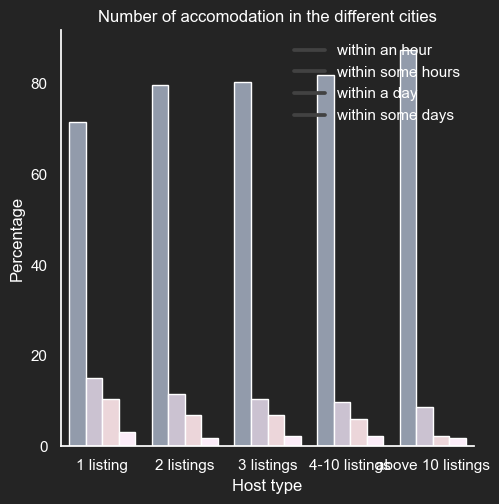

In [56]:

# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot

g = sns.catplot(data=new_df, kind='bar', x='host_type', y= 'Percent', hue='host_response_time', legend = False, palette = c)

titel = plt.title('Number of accomodation in the different cities')
legend = plt.legend(['within an hour', 'within some hours', 'within a day', 'within some days'], loc=0, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

# change axes labels and ticks to white    
xlabel = plt.xlabel('Host type')
ylabel = plt.ylabel('Percentage')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['1 listing','2 listings','3 listings', '4-10 listings', 'above 10 listings'])
ytick = plt.yticks(color="white")

titel.set_color("white")
        
# Turns off grid on the left Axis.
g.ax.grid(False)
sns.despine()

86 % of the corporate hosts replied within an hour.

#### Small hosts (single listing) response time

In [57]:
df_singlehosts = df.query('host_type == 1')

In [58]:
df_singlehosts.host_name.count()

9005

<Axes: >

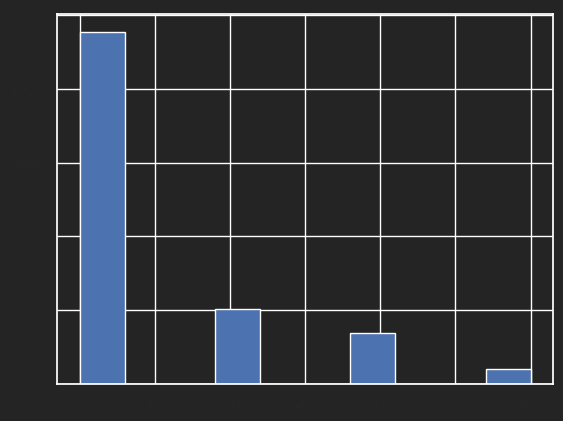

In [59]:
df_singlehosts.host_response_time.hist()

In [60]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 1].host_name.count()

4776

In [61]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 2].host_name.count()

1011

In [62]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 3].host_name.count()

690

In [63]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 4].host_name.count()

206

In [64]:
df_singlehosts['host_response_time'].isnull().sum()

2324

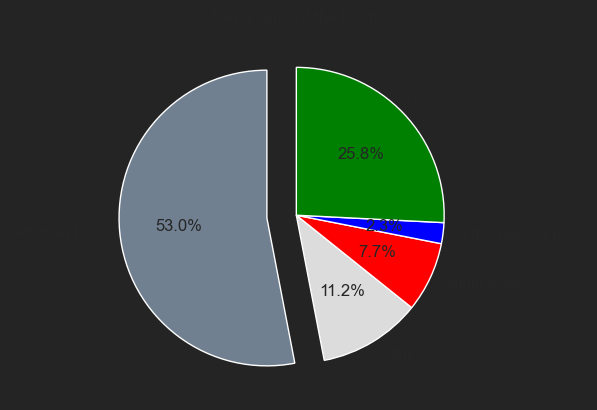

In [65]:
y = np.array([4776, 1011, 690, 206, 2324])
mylabels = ['within an hour', 'within few hours', 'within a day', 'a few days or more', 'nan']


mycolors = ["slategrey", "gainsboro", "red", "blue", 'green']
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Reply time of the hosts")
plt.show() 

More than half of the hosts with one apartment replying within an hour

#### Small hosts (2 listing) response time

In [66]:
df_doublehosts = df.query('host_type == 2')

In [67]:
df_doublehosts.host_name.count()

3390

<Axes: >

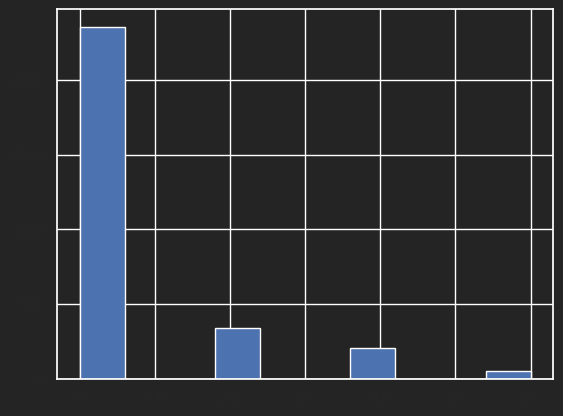

In [68]:
df_doublehosts.host_response_time.hist()

#### Middle hosts (3 listings) response time

In [69]:
df_triplehosts = df.query('host_type == 3')

In [70]:
df_triplehosts.host_name.count()

2631

<Axes: >

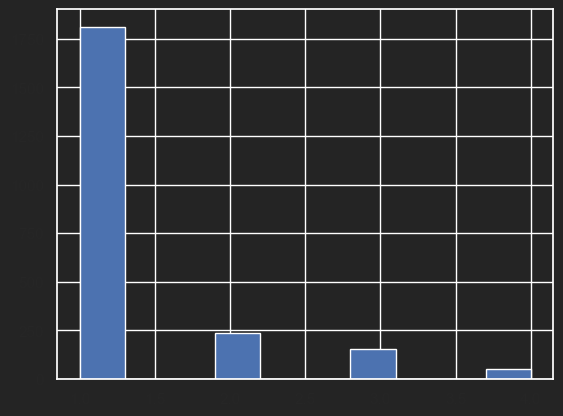

In [71]:
df_triplehosts.host_response_time.hist()

#### Middle hosts (4-10 listings) response time

In [72]:
df_middlehosts = df.query('host_type == 4')

In [73]:
df_middlehosts.host_name.count()

6471

<Axes: >

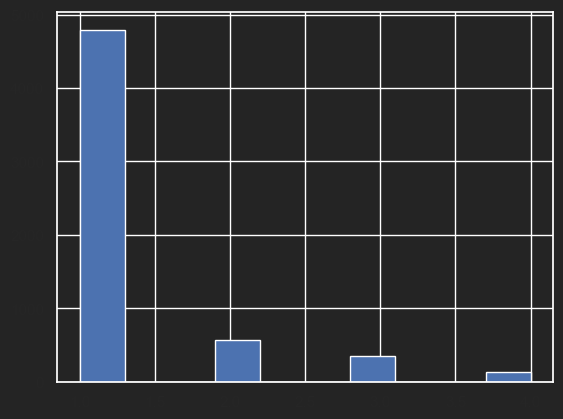

In [74]:
df_middlehosts.host_response_time.hist()

No pattern in the response time

In [75]:
df_bighosts = df.query('host_type == 5')

In [76]:
df_bighosts['host_acceptance_rate']

23       100%
49        98%
50        98%
138      100%
140      100%
         ... 
24863    100%
24869     96%
24874    100%
24883     96%
24893     99%
Name: host_acceptance_rate, Length: 3419, dtype: object

In [77]:
df_bighosts['host_acceptance_rate'] = df_bighosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [78]:
df_bighosts['host_acceptance_rate'].mean()

0.9381778169014086

In [79]:
df_singlehosts['host_acceptance_rate'] = df_singlehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [80]:
df_singlehosts['host_acceptance_rate'].mean()

0.8578545006165229

In [81]:
df_doublehosts['host_acceptance_rate'] = df_doublehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [82]:
df_doublehosts['host_acceptance_rate'].mean()

0.8932051282051283

In [83]:
df_triplehosts['host_acceptance_rate'] = df_triplehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [84]:
df_triplehosts['host_acceptance_rate'].mean()

0.8822878228782288

In [85]:
df_middlehosts['host_acceptance_rate'] = df_middlehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

In [86]:
df_middlehosts['host_acceptance_rate'].mean()

0.9004453049370763

Possible commertial hosts (more than 3 flats) having a higher acceptance rate.

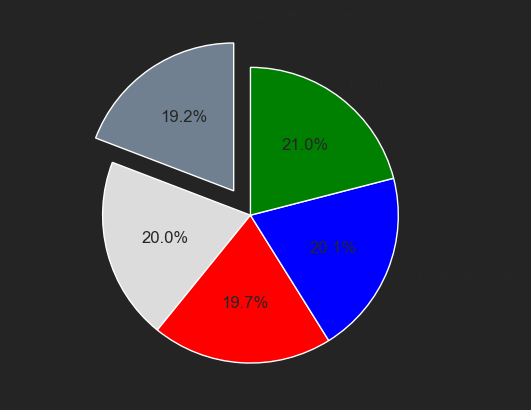

In [87]:
y = np.array([0.8579, 0.8932, 0.8823, 0.9004, 0.9382])
mylabels = ['single_host', 'double_host', 'triple_host', '4-10 appartments', 'big hosts']


mycolors = ["slategrey", "gainsboro", "red", "blue", 'green']
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Acceptance rate of the hosts")
plt.show() 